In [ ]:
!pip install sklearn

In [34]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 9.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.8/960.8 kB 5.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 kB 4.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 MB/s eta 0:00:00:00:0100:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [1]:
def bed_line_cluster_array(line, cluster_start, cluster_stop):
    line = line.rstrip().split('\t')
    read_start = int(line[1])
    read_stop = int(line[2])
    blocks = [int(x) for x in line[10].split(',')]
    starts = [int(x) for x in line[11].split(',')]

    cluster_idxs = {pos: None for pos in range(cluster_start, cluster_stop+1)}
    for pos in range(read_start, read_stop+1):
        if pos in cluster_idxs:
            cluster_idxs[pos] = 0.0

    for st, bl in zip(starts, blocks):
        for x in range(read_start+st, read_start+st+bl+1):
            if x in cluster_idxs:
                cluster_idxs[x] = 1
    cluster_array = [a[1] for a in sorted(cluster_idxs.items(), key=lambda x: x[0])]
    return cluster_array

In [2]:
def pct_full(arr):
    n_none = sum(1 for x in arr if x is None)
    return 1 - float(n_none) / len(arr)

In [3]:
def convert_nones(arr):
    return [x if x is not None else -1 for x in arr]

In [4]:
acc = []
cstart = 703176
cstop = 708174
filename = "/home/brandon/Research/clb6.cawlr.chrVII_703176-708174.sma.bed"
with open(filename, 'r') as bedfile:
    next(bedfile)
    for line in bedfile:
        arr = bed_line_cluster_array(line, cluster_start=cstart, cluster_stop=cstop)
        if pct_full(arr) > 0.9:
            acc.append(convert_nones(arr))


In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=3)

In [7]:
cluster_results = kmeans.fit_predict(acc)

In [8]:
from collections import defaultdict

def split_clusters(cresults, carrays):
    labels = defaultdict(list)
    for idx, res in enumerate(carrays):
        label = cresults[idx]
        labels[label].append(res)
    return labels

In [9]:
labeled_arrays = split_clusters(cluster_results, acc)

In [11]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x7f5f6cc2a6b0>,
 [Text(0, 0, '703176'),
  Text(200, 0, '703376'),
  Text(400, 0, '703576'),
  Text(600, 0, '703776'),
  Text(800, 0, '703976'),
  Text(1000, 0, '704176'),
  Text(1200, 0, '704376'),
  Text(1400, 0, '704576'),
  Text(1600, 0, '704776'),
  Text(1800, 0, '704976'),
  Text(2000, 0, '705176'),
  Text(2200, 0, '705376'),
  Text(2400, 0, '705576'),
  Text(2600, 0, '705776'),
  Text(2800, 0, '705976'),
  Text(3000, 0, '706176'),
  Text(3200, 0, '706376'),
  Text(3400, 0, '706576'),
  Text(3600, 0, '706776'),
  Text(3800, 0, '706976'),
  Text(4000, 0, '707176'),
  Text(4200, 0, '707376'),
  Text(4400, 0, '707576'),
  Text(4600, 0, '707776'),
  Text(4800, 0, '707976')])

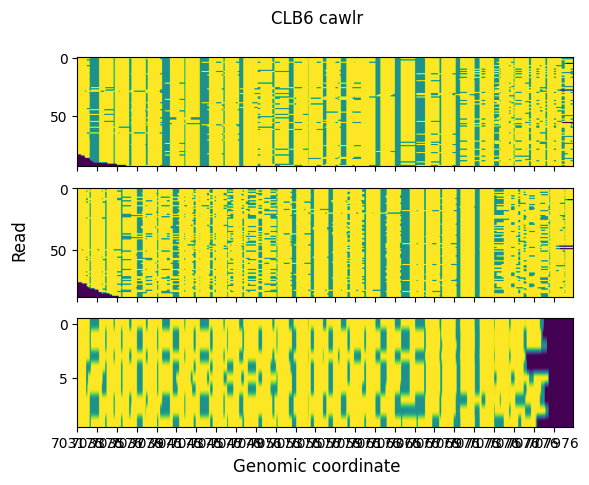

In [12]:
suptitle = "CLB6 cawlr"
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True)
for idx, arrs in labeled_arrays.items():
    axs[idx].imshow(arrs, aspect="auto")
# plt.tight_layoutg(pad=0.7)
fig.suptitle(suptitle)
fig.supylabel("Read")
fig.supxlabel("Genomic coordinate")
plt.xticks(ticks=range(0, (cstop - cstart), 200), labels=range(cstart, cstop, 200))